# U IME OCA I SINA AMIN #

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from utils_nans1 import *
import matplotlib.pyplot as plt

## Z1 ##

### Ucitati train i test ###
### Izbaciti redove sa nepostojecim vrednostima ###
### Kreirati model ###
### Izbaciti ocenu modela ali sa test podacima ###
### je li ispunjena linearnost (opciono valjda jer nikada nece biti idk) ###

In [2]:
#Ucitati train i test
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

#Izbaciti redove sa nepostojecim vrednostima
df_train = df_train.dropna()

#Kreiranje modela
x_train = df_train.drop(columns='AirPollution')
y_train = df_train['AirPollution']
model = get_fitted_model(x_train, y_train)

x_test = df_test.drop(columns='AirPollution')
y_test = df_test['AirPollution']

#Ocena modela (kriterijum ocenjivanja zavisi od zadatka)
print(get_rsquared_adj(model, x_test, y_test))

0.3130753047426019


## Z2 ##

### Samo uzeti interval poverenja za dato obelezje ###
### Objasniti da li je ispravno (ukoliko postoji autokorelacija onda ne valja, ako je nema onda valja) ###

Min = 2.27
Max = 3.22


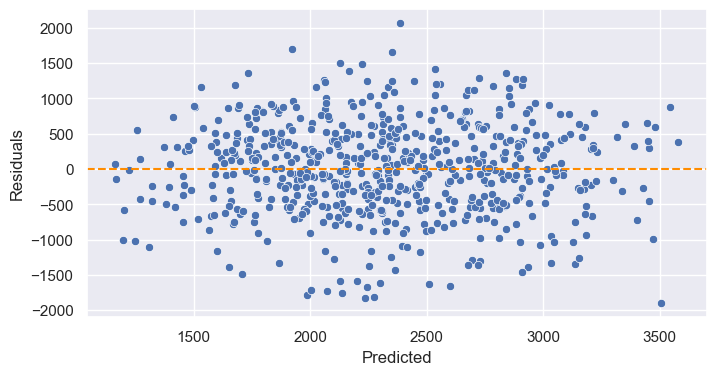

Minimalne i maksimalne vrednosti su validne jer nema autokorelacije izmedju gresaka (vazi nezavisnost gresaka)


In [10]:
# Uzimanje intervala poverenja za dato obelezje
min, max = get_conf_interval(model, 'TrafficDensity')
print(f'Min = {min:.2f}')
print(f'Max = {max:.2f}')

# Diskutovanje dobijenih vrednosti
autocorellation = independence_of_errors_assumption(model, sm.add_constant(x_train), y_train)
if autocorellation[0] is None: 
    print('Minimalne i maksimalne vrednosti su validne jer nema autokorelacije izmedju gresaka (vazi nezavisnost gresaka)')
else:
    print('Minimalne i maksimalne vrednosti nisu validne jer postoji autokorelacije izmedju gresaka (narusena nezavisnost gresaka)')

# Z3 # SOTONA

### *Najbolje zapoceti sa ponovnim ucitavanjem podataka ili u novom fajlu* ###
### Proveriti koje su to nedostajuce vrednosti ###
### Dalje raditi po ovom umodebilnom kombinatorika sablonu ###
### Ispitati L.I.N.E. Pretpostavke, ukoliko LINE vraca false samo zbog N. pretpostavke, moze se zanemariti ako ima >150 redova podataka (valjda, pitaj na kolokvijumu) ###

                N missing  % missing
TrafficDensity        210       30.0
GreenSpace            140       20.0


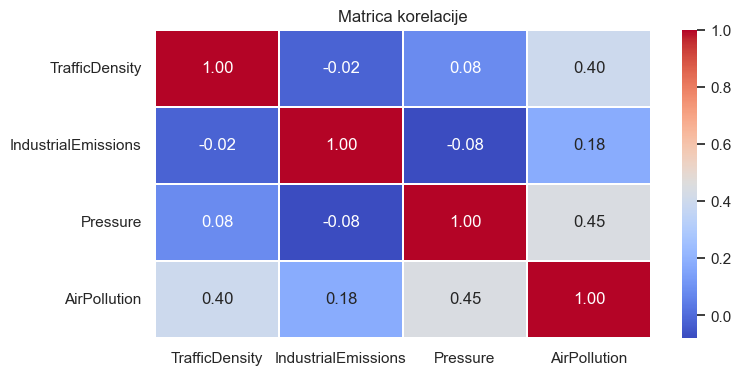

Validation r2_adj = 0.446973074300163
Test r2_adj = 0.5045660510095198
                            OLS Regression Results                            
Dep. Variable:           AirPollution   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.74e-61
Time:                        00:42:30   Log-Likelihood:                -4979.3
No. Observations:                 630   AIC:                             9967.
Df Residuals:                     626   BIC:                             9984.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
df = pd.read_csv('./data/train.csv', sep=',')
df_test = pd.read_csv('./data/test.csv', sep=',')

# Dovoljno samo jednom pa posle obrisati, recimo u ovom slucaju su to 
# TrafficDensity i GreenSpace
print(check_for_missing_values(df)) 

# Nedostajuce vrednosti popravka, bukv probati sve kombinacije i gledati sto bolju ocenu
# Ja radim prvo isprobam sve moguce resavanje nepostojecih podataka (bez brisanja kolona, korak ispod) 
# i onda izaberem onu sa najboljom ocenom i onda brisem kolone,
# da li uvek radi kako treba, ne tj. ne mora da znaci da ce najbolja ocena sada, biti najbolja ocena
# u sledecem koraku, srecno.... (hint zapisuj ocene za kombinacije sta si sve radio)

# Za primer sa TrafficDensity i GreenSpace
# 1. Probati fill_mean TrafficDensity i GreenSpace
#   df = fillna_mean(df, 'TrafficDensity')
#   df = fillna_mean(df, 'GreenSpace')
# 2.    -TrafficDensity linear, GreenSpace linear
#       -TrafficDensity spline, GreenSpace linear
#       -TrafficDensity linear, GreenSpace spline
#       -TrafficDensity spline, GreenSpace spline

#Bukvalno po kombinacija otkomenarisati ili zakomentarisati odredjene linije sledeceg koda
# Ovo je prime za -TrafficDensity linear, GreenSpace spline
df['TrafficDensity'] = df['TrafficDensity'].interpolate(method='linear', limit_direction='both')
    #df['GreenSpace'] = df['GreenSpace'].interpolate(method='linear', limit_direction='both')
    #df['TrafficDensity'] = df['TrafficDensity'].interpolate(method='spline', order=3, limit_direction='both')
df['GreenSpace'] = df['GreenSpace'].interpolate(method='spline', order=4, limit_direction='both')

### HINT ZA NEPOZNATE PODATKE (GORE), UGLAVNOM BUDE JEDNO SPLINE, DRUGO LINEAR (ne tim redosledom nego ili ili) ###

#Ovde dodajes kolone koje se brisu da li zbog matrice kolinearnosti ili zbog onog T-testa (P > |t|)
columns = ['Wind', 'WindSpeed', 'Temperature', 'GreenSpace']
df = df.drop(columns=columns)
df_test = df_test.drop(columns=columns)

x = df.drop(columns=['AirPollution'])
y = df['AirPollution']
x_test = df_test.drop(columns=['AirPollution'])
y_test = df_test['AirPollution']
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.9, shuffle=True, random_state=42)

model = get_fitted_model(x_train, y_train)
adj_r2 = get_rsquared_adj(model, x_val, y_val)
adj_r2_test = get_rsquared_adj(model, x_test, y_test)

perfect_collinearity_assumption(df)
print(f'Validation r2_adj = {adj_r2}')
print(f'Test r2_adj = {adj_r2_test}')
print(model.summary())